In [1]:
!conda env list

# conda environments:
#
base                     /Users/beinnile/opt/anaconda3
PythonData               /Users/beinnile/opt/anaconda3/envs/PythonData
dsfs                     /Users/beinnile/opt/anaconda3/envs/dsfs
gmaps                 *  /Users/beinnile/opt/anaconda3/envs/gmaps



In [18]:
import requests
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import gmaps
from config import gkey
from config import api_key

In [19]:
url_cov = "https://covidtracking.com"
current_data = "/api/v1/us/current.json"
response_current = requests.get(url_cov+current_data).json()
pprint(response_current)


[{'death': 76617,
  'hash': '94a5dcff7e4171ee6b9c9a1855b0b8e8620a3b89',
  'hospitalized': 142861,
  'hospitalizedCumulative': 142861,
  'hospitalizedCurrently': 45199,
  'inIcuCumulative': 5595,
  'inIcuCurrently': 11708,
  'lastModified': '2020-05-13T04:12:25.184Z',
  'negative': 8277225,
  'notes': 'NOTE: "total", "posNeg", "hospitalized" will be removed in the '
           'future.',
  'onVentilatorCumulative': 559,
  'onVentilatorCurrently': 6615,
  'pending': 1803,
  'posNeg': 9637930,
  'positive': 1360705,
  'recovered': 230287,
  'total': 9639733,
  'totalTestResults': 9637930}]


In [20]:
dates = ["20200131", "20200313", "20200323", "20200327", "20200331", "20200416", "20200508"]
total = []
for date in dates:
    date_data = f"/api/v1/us/{date}.json"
    response_date = requests.get(url_cov+date_data).json()
    total_positive = response_date["positive"]
    total.append(total_positive)
    
print(total)

[1, 3004, 47013, 105462, 189998, 664129, 1275916]


In [21]:
cov_df = pd.DataFrame({"Date": dates, "Total": total})
cov_df

,Date,Total
0,20200131,1
1,20200313,3004
2,20200323,47013
3,20200327,105462
4,20200331,189998
5,20200416,664129
6,20200508,1275916


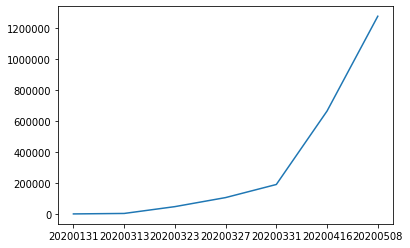

In [22]:
plt.plot(cov_df["Date"], cov_df["Total"])
plt.xticks()
plt.show()

In [35]:
headquarter=[]
name_compnay = [
    "Netflix", "Activision Blizzard", "Cinemark", "Live Nation Entertainment", "Amazon", "Ebay", "TJ Maxx", "Big Lots", "Macy's",
    "Kroger", "Campbell Soup", "McDonald’s", "J Alexanders Holding Inc", "Extended Stay", "United Airlines", "Marriott International Inc",
    "Clearwater Paper Corp", "Clorox", "T-mobile", "Microsoft"
]
stocks = [
    "NFLX", "ATVI", "CNK", "LYV", "AMZN", "EBAY", "TJX" , "BIG", "M", "KR", "CPB", 
    "MCD", "JAX", "STAY", "UAL", "MAR", "CLW", "CLX", "TMUS", "MSFT"
]

url_state = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/stock/v2/get-profile"

for stock in stocks:
    querystring = {"symbol":stock}

    headers = {
        'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com",
        'x-rapidapi-key': api_key
        }

    response_profile = requests.request("GET", url_state, headers=headers, params=querystring).json()

    headquarter_state = response_profile["assetProfile"]["state"]

    headquarter.append(headquarter_state)

assert len(headquarter)==len(stocks)

headquarter_df = pd.DataFrame({"Company": name_compnay, "Headquarter": headquarter})
print(headquarter_df)

                       Company Headquarter
0                      Netflix          CA
1          Activision Blizzard          CA
2                     Cinemark          TX
3    Live Nation Entertainment          CA
4                       Amazon          WA
5                         Ebay          CA
6                      TJ Maxx          MA
7                     Big Lots          OH
8                       Macy's          NY
9                       Kroger          OH
10               Campbell Soup          NJ
11                  McDonald’s          IL
12    J Alexanders Holding Inc          TN
13               Extended Stay          NC
14             United Airlines          IL
15  Marriott International Inc          MD
16       Clearwater Paper Corp          WA
17                      Clorox          CA
18                    T-mobile          WA
19                   Microsoft          WA


In [36]:
headquarter_df["Company"]=headquarter_df.groupby(["Headquarter"])["Company"].transform(lambda x: ','.join(x))
headquarter_unique_df = headquarter_df.drop_duplicates()
reset_headquarter = headquarter_unique_df.reset_index()

reset_headquarter = reset_headquarter.iloc[:,1:3]
reset_headquarter = reset_headquarter.sort_index(ascending=False)

headquarter_setindex = reset_headquarter.set_index(["Headquarter", "Company"])

headquarter_transposed = headquarter_setindex.T
headquarter_transposed


Headquarter,MD,NC,TN,IL,NJ,NY,OH,MA,WA,TX,CA
Company,Marriott International Inc,Extended Stay,J Alexanders Holding Inc,"McDonald’s,United Airlines",Campbell Soup,Macy's,"Big Lots,Kroger",TJ Maxx,"Amazon,Clearwater Paper Corp,T-mobile,Microsoft",Cinemark,"Netflix,Activision Blizzard,Live Nation Entertainment,Ebay,Clorox"


In [37]:
state_date = f"/api/v1/states/CA/20200313.json"
response_current = requests.get(url_cov+state_date).json()
total_positive_per_date = response_current["positive"]
total_positive_per_date

202

In [41]:
headquarter_unique = headquarter_df["Headquarter"].unique()
headquarter_unique

dates.remove("20200131")
print(dates)


['20200313', '20200323', '20200327', '20200331', '20200416', '20200508']


In [42]:
merge_df = pd.DataFrame(columns = ["Date"])
for state in headquarter_unique:
    cov_per_date = []
    date_per_state = []
    for date in dates:

        state_date = f"/api/v1/states/{state}/{date}.json"
        response_current = requests.get(url_cov+state_date).json()
        total_positive_per_date = response_current["positive"]
        cov_per_date.append(total_positive_per_date)
        date_per_state.append(date)
    date_covnumber_df = pd.DataFrame({"Date":date_per_state, f"{state}": cov_per_date})
    merge_df = pd.merge(date_covnumber_df, merge_df, how = "outer", on = "Date" )

merge_index = merge_df.set_index(["Date"])
print(merge_index)

             MD     NC     TN     IL      NJ      NY     OH     MA     WA  \
Date                                                                        
20200313     17     15     26     32      50     421     13     23    702   
20200323    288    297    615   1273    2844   20875    442    678   2496   
20200327    774    763   1203   3026    8825   44635   1137   3151   4305   
20200331   1660   1498   2239   5994   18696   75795   2199   6521   6049   
20200416  10784   5465   6262  25733   75317  222284   8414  32492  11343   
20200508  30485  13868  14441  73760  135454  330407  23016  75333  16231   

             TX     CA  
Date                    
20200313     39    202  
20200323    352   1733  
20200327   1731   3879  
20200331   3266   7482  
20200416  16455  26182  
20200508  36609  62512  


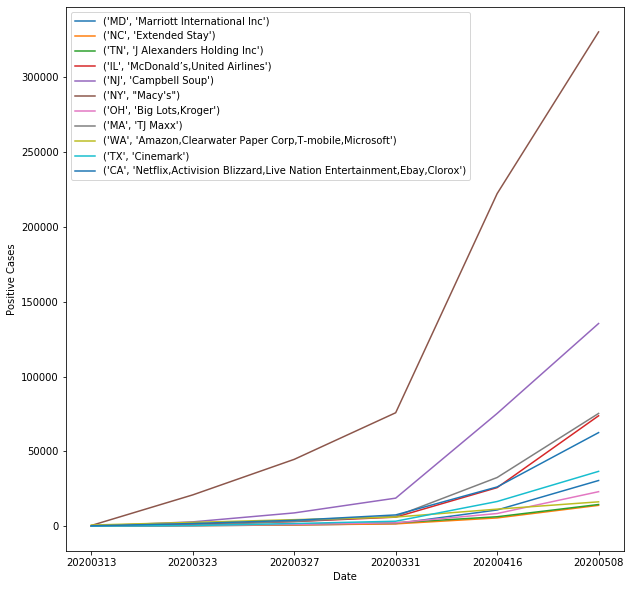

In [43]:
merge_index.plot(kind = "line", figsize = (10,10))
plt.legend(headquarter_transposed)
plt.ylabel("Positive Cases")
plt.show()

In [44]:
gmaps.configure(api_key = gkey)

In [45]:
params = {"key": gkey}
headquarter_unique_df = headquarter_df["Headquarter"].unique()
state_pd = pd.DataFrame({"State": headquarter_unique_df})
state_pd

# Loop through the cities_pd and run a lat/long search for each city
for index, row in state_pd.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"

    state = row['State']

    # update address key value
    params['address'] = f"{state}"

    # make request
    state_lat_lng = requests.get(base_url, params=params)
    
    # print the cities_lat_lng url, avoid doing for public github repos in order to avoid exposing key
    # print(cities_lat_lng.url)
    
    # convert to json
    state_lat_lng = state_lat_lng.json()
    
#     pprint(state_lat_lng)
    
    state_pd.loc[index, "Lat"] = state_lat_lng["results"][0]["geometry"]["location"]["lat"]
    state_pd.loc[index, "Lng"] = state_lat_lng["results"][0]["geometry"]["location"]["lng"]

# Visualize to confirm lat lng appear
state_pd

,State,Lat,Lng
0,CA,36.778261,-119.417932
1,TX,31.968599,-99.901813
2,WA,47.751074,-120.740139
3,MA,42.407211,-71.382437
4,OH,40.417287,-82.907123
5,NY,40.712775,-74.005973
6,NJ,40.058324,-74.405661
7,IL,40.633125,-89.398528
8,TN,35.517491,-86.580447
9,NC,35.759573,-79.019300


In [46]:
state_transposed = merge_index.T
state_transposed = state_transposed.reset_index()
state_transposed = state_transposed.rename(columns = {"index": "State"})
merged_state = pd.merge(state_pd, state_transposed, on = "State")
merged_state

,State,Lat,Lng,20200313,20200323,20200327,20200331,20200416,20200508
0,CA,36.778261,-119.417932,202,1733,3879,7482,26182,62512
1,TX,31.968599,-99.901813,39,352,1731,3266,16455,36609
2,WA,47.751074,-120.740139,702,2496,4305,6049,11343,16231
3,MA,42.407211,-71.382437,23,678,3151,6521,32492,75333
4,OH,40.417287,-82.907123,13,442,1137,2199,8414,23016
5,NY,40.712775,-74.005973,421,20875,44635,75795,222284,330407
6,NJ,40.058324,-74.405661,50,2844,8825,18696,75317,135454
7,IL,40.633125,-89.398528,32,1273,3026,5994,25733,73760
8,TN,35.517491,-86.580447,26,615,1203,2239,6262,14441
9,NC,35.759573,-79.019300,15,297,763,1498,5465,13868


In [47]:
location = merged_state[["Lat", "Lng"]]
rating = merged_state["20200508"]

In [48]:
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(
    location,
    weights = rating,
    dissipating = True,
    max_intensity = 20000
)

fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))